## Data Loading

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from gomatch.data.dataset_loaders import init_data_loader

config = dict(
    data_root='../data',
    dataset='megadepth',
    dataset_conf='../configs/datasets.yml', 
    p2d_type='sift', 
    p3d_type='coords', 
    topk=1, 
    npts=[10, 1024], 
    outlier_rate=[0, 1],
)

data_loader = init_data_loader(config, split='test')





[2022-07-10 14:17:34|data_loader|INFO]: Init data loader: split=test training=False batch=16...
[2022-07-10 14:17:34|data_process|INFO]: Loading data file from ../data/MegaDepth_undistort/data_processed/v2/sift_pts/megadepth_2d3d_q500ov0.35tp3-10_imsz.irat1.5.sift1024.npy
[2022-07-10 14:17:36|data_process|INFO]: Loading scene 3D points from ../data/MegaDepth_undistort/data_processed/v2/scene_points3d/test.npy ...
[2022-07-10 14:17:44|data_process|INFO]: Done with 3D data loading.
[2022-07-10 14:17:44|data_process|INFO]: Fetching scene data for: 53 scenes
Feature dir:../data/MegaDepth_undistort/data_processed/v2/desc_cache/SIFT1024
[2022-07-10 14:19:00|data_process|INFO]: Finished loading scenes: 49, queries: 7344 im.pts3d:369 #ims(pts3d <20)=13
[2022-07-10 14:19:00|data_loader|INFO]: 
Dataset:megadepth split=test scenes:53 queries: 7344
Data processed dir: ../data/MegaDepth_undistort/data_processed/v2
Settings=(
  topk=1, random_topk=False, orate=[0, 1], npt=[10, 1024],
  p2d_type=sift

## Architcture ablations

In [4]:
import os
from gomatch_eval.ablate_models import ablate_archs

# Define models
gomatchbvs = '../outputs/shared_outputs/release_models/exported_models/GoMatchBVs_best.ckpt'
gomatchcoords = '../outputs/shared_outputs/release_models/exported_models/GoMatchCoords_best.ckpt'
bpnpnet = '../outputs/shared_outputs/release_models/exported_models/BPnPNet.ckpt'

# Define output dir
dataset = data_loader.dataset
tag = f'covis{dataset.topk}inls{dataset.inls2d_thres}'
if dataset.normalized_thres:
    tag += 'normth'
cache_dir = os.path.join('../outputs/benchmark_cache_release/arch_ablation', tag)

# Establish oracle upperbound
ablate_archs(
    None, data_loader, cache_dir, 
    oracle=True, debug=False, overwrite=False
)

# Eval ablation models
model_ckpts = [bpnpnet, gomatchbvs, gomatchcoords]
ablate_archs(
    model_ckpts, data_loader, cache_dir, 
    oracle=False, debug=False, overwrite=False
)



[2022-07-10 14:20:28|gomatch_eval|INFO]: 


>>>>>None
[2022-07-10 14:20:28|gomatch_eval|INFO]: Load cache: ../outputs/benchmark_cache_release/arch_ablation/covis1inls1/OracleMatcher.npy
[2022-07-10 14:20:29|metrics|INFO]: Query total=7344 evaluated=7344 failed=42
[2022-07-10 14:20:29|metrics|INFO]: Mean n2d=780 n3d=442 n_matches=101
[2022-07-10 14:20:29|metrics|INFO]: R_qs=[0.03 0.06 0.1 ] t_qs=[0.   0.   0.01]m/[0.25 0.48 0.98]cm
[2022-07-10 14:20:29|metrics|INFO]: Localize recall@(<5cm5deg/0.25m2deg/0.5m5deg/1m10deg): 97.28/99.21/99.31/99.36 %
[2022-07-10 14:20:30|metrics|INFO]: 
Reproj Sample/N(mean/max/min)=7344/101/525/1
Ratios(%): mean=inf [0,0.5)=63.27 [0.5,1)=31.88 [1,5)=4.22 [5,10)=0.03 [10,20)=0.01 [20,100)=0.02 [100,1000)=0.01
[2022-07-10 14:20:30|metrics|INFO]: 
ReprojThres=[1, 5, 10, 15, 50, 100, 500]px AUC=[54.58 90.37 94.87 96.38 98.5  98.97 99.34] nsamples=7344
[2022-07-10 14:20:30|gomatch_eval|INFO]: 


>>>>>../outputs/shared_outputs/release_models/exported_models/BPnP

## Max outlier rate ablations

In [5]:
from gomatch_eval.ablate_models import ablate_max_orate

# Define models
gomatchbvs = '../outputs/shared_outputs/release_models/exported_models/GoMatchBVs_best.ckpt'
gomatchcoords = '../outputs/shared_outputs/release_models/exported_models/GoMatchCoords_best.ckpt'
bpnpnet = '../outputs/shared_outputs/release_models/exported_models/BPnPNet.ckpt'

# Define output dir
dataset = data_loader.dataset
tag = f'covis{dataset.topk}inls{dataset.inls2d_thres}'
if dataset.normalized_thres:
    tag += 'normth'
cache_dir = os.path.join('../outputs/benchmark_cache_release/orate_ablation', tag)

# Establish oracle upperbound
ablate_max_orate(
    None, data_loader, cache_dir, 
    oracle=True, debug=False, overwrite=False
)



[2022-07-10 14:30:47|gomatch_eval|INFO]: 




>>>>>None
[2022-07-10 14:30:47|gomatch_eval|INFO]: Load cache: ../outputs/benchmark_cache_release/orate_ablation/covis1inls1/OracleMatcher.npy
[2022-07-10 14:30:51|gomatch_eval|INFO]: 

>>>>> orate=[0, 1.0] 
[2022-07-10 14:30:51|metrics|INFO]: Query total=7344 evaluated=7344 failed=42
[2022-07-10 14:30:51|metrics|INFO]: Mean n2d=780 n3d=442 n_matches=101
[2022-07-10 14:30:51|metrics|INFO]: R_qs=[0.03 0.06 0.1 ] t_qs=[0.   0.   0.01]m/[0.25 0.48 0.98]cm
[2022-07-10 14:30:51|metrics|INFO]: Localize recall@(<5cm5deg/0.25m2deg/0.5m5deg/1m10deg): 97.28/99.21/99.31/99.36 %
[2022-07-10 14:30:52|metrics|INFO]: 
Reproj Sample/N(mean/max/min)=7344/101/525/1
Ratios(%): mean=inf [0,0.5)=63.27 [0.5,1)=31.88 [1,5)=4.22 [5,10)=0.03 [10,20)=0.01 [20,100)=0.02 [100,1000)=0.01
[2022-07-10 14:30:52|metrics|INFO]: 
ReprojThres=[1, 5, 10, 15, 50, 100, 500]px AUC=[54.58 90.37 94.87 96.38 98.5  98.97 99.34] nsamples=7344
[2022-07-10 14:30:52|gomatch_eval|INFO]: 


In [6]:
# Eval ablation models
model_ckpts = [bpnpnet]
ablate_max_orate(
    model_ckpts, data_loader, cache_dir, 
    oracle=False, debug=False, overwrite=False

)

[2022-07-10 14:30:54|gomatch_eval|INFO]: 




>>>>>../outputs/shared_outputs/release_models/exported_models/BPnPNet.ckpt
[2022-07-10 14:30:54|gomatch_eval|INFO]: Load cache: ../outputs/benchmark_cache_release/orate_ablation/covis1inls1/BPnPNet.npy
[2022-07-10 14:30:59|gomatch_eval|INFO]: 

>>>>> orate=[0, 1.0] 
[2022-07-10 14:30:59|metrics|INFO]: Query total=7344 evaluated=7344 failed=17
[2022-07-10 14:30:59|metrics|INFO]: Mean n2d=780 n3d=442 n_matches=242
[2022-07-10 14:30:59|metrics|INFO]: R_qs=[15.17 31.05 59.78] t_qs=[1.67 3.14 5.31]m/[166.8  313.5  530.73]cm
[2022-07-10 14:30:59|metrics|INFO]: Localize recall@(<5cm5deg/0.25m2deg/0.5m5deg/1m10deg): 0.74/1.36/3.13/8.54 %
[2022-07-10 14:30:59|metrics|INFO]: 
Reproj Sample/N(mean/max/min)=7344/101/525/1
Ratios(%): mean=inf [0,0.5)=0.56 [0.5,1)=0.37 [1,5)=1.28 [5,10)=1.58 [10,20)=3.59 [20,100)=28.98 [100,1000)=60.91
[2022-07-10 14:30:59|metrics|INFO]: 
ReprojThres=[1, 5, 10, 15, 50, 100, 500]px AUC=[ 0.34  0.83  1.21  1.59  4.66 11.41

### Plot curves for max orate ablation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[2022-07-10 14:56:56|plot|INFO]: >>Max orate:1.0
[2022-07-10 14:56:56|metrics|INFO]: Query total=7344 evaluated=7344 failed=17
[2022-07-10 14:56:56|metrics|INFO]: Mean n2d=780 n3d=442 n_matches=242
[2022-07-10 14:56:56|metrics|INFO]: R_qs=[15.17 31.05 59.78] t_qs=[1.67 3.14 5.31]m/[166.8  313.5  530.73]cm
[2022-07-10 14:56:56|metrics|INFO]: Localize recall@(<5cm5deg/0.25m2deg/0.5m5deg/1m10deg): 0.74/1.36/3.13/8.54 %
[2022-07-10 14:56:56|metrics|INFO]: 
Reproj Sample/N(mean/max/min)=7344/101/525/1
Ratios(%): mean=inf [0,0.5)=0.56 [0.5,1)=0.37 [1,5)=1.28 [5,10)=1.58 [10,20)=3.59 [20,100)=28.98 [100,1000)=60.91
[2022-07-10 14:56:56|metrics|INFO]: 
ReprojThres=[1, 5, 10]px AUC=[0.34 0.83 1.21] nsamples=7344
[2022-07-10 14:56:56|metrics|INFO]: Matching time (per pair):5.22 ms
[2022-07-10 14:56:56|plot|INFO]: >>Max orate:0.75
[2022-07-10 14:56:57|metrics|INFO]: Query total=7344 evaluated=7310 failed=158
[2022-07-10 14:56:57|metrics|INFO]: Mean n2d=384 n3d=338 n_matches=179
[2022-07-10 14:56:

BPnPNet max orates=[1.0, 0.75, 0.5, 0.25, 0] AUC@[1, 5, 10]px
[[ 0.34  0.83  1.21]
 [ 0.51  1.51  2.15]
 [ 4.16 12.74 15.84]
 [24.97 54.8  60.51]
 [48.26 83.44 88.21]]


[2022-07-10 14:57:03|plot|INFO]: >>Max orate:1.0
[2022-07-10 14:57:03|metrics|INFO]: Query total=7344 evaluated=7344 failed=14
[2022-07-10 14:57:03|metrics|INFO]: Mean n2d=780 n3d=442 n_matches=95
[2022-07-10 14:57:03|metrics|INFO]: R_qs=[ 0.36  6.97 29.85] t_qs=[0.03 0.69 3.38]m/[  3.38  69.21 338.29]cm
[2022-07-10 14:57:03|metrics|INFO]: Localize recall@(<5cm5deg/0.25m2deg/0.5m5deg/1m10deg): 28.47/38.17/44.59/50.23 %
[2022-07-10 14:57:03|metrics|INFO]: 
Reproj Sample/N(mean/max/min)=7344/101/525/1
Ratios(%): mean=inf [0,0.5)=15.95 [0.5,1)=11.43 [1,5)=13.03 [5,10)=4.86 [10,20)=4.93 [20,100)=14.56 [100,1000)=34.04
[2022-07-10 14:57:04|metrics|INFO]: 
ReprojThres=[1, 5, 10]px AUC=[10.3  29.08 34.79] nsamples=7344
[2022-07-10 14:57:04|metrics|INFO]: Matching time (per pair):49.05 ms
[2022-07-10 14:57:04|plot|INFO]: >>Max orate:0.75
[2022-07-10 14:57:04|metrics|INFO]: Query total=7344 evaluated=7310 failed=233
[2022-07-10 14:57:04|metrics|INFO]: Mean n2d=384 n3d=338 n_matches=80
[2022-07-

GoMatch max orates=[1.0, 0.75, 0.5, 0.25, 0] AUC@[1, 5, 10]px
[[10.3  29.08 34.79]
 [21.44 52.39 59.09]
 [39.94 79.76 85.88]
 [43.34 84.38 90.39]
 [42.38 84.67 90.9 ]]


[2022-07-10 14:57:10|plot|INFO]: >>Max orate:1.0
[2022-07-10 14:57:10|metrics|INFO]: Query total=7344 evaluated=7344 failed=42
[2022-07-10 14:57:10|metrics|INFO]: Mean n2d=780 n3d=442 n_matches=101
[2022-07-10 14:57:10|metrics|INFO]: R_qs=[0.03 0.06 0.1 ] t_qs=[0.   0.   0.01]m/[0.25 0.48 0.98]cm
[2022-07-10 14:57:10|metrics|INFO]: Localize recall@(<5cm5deg/0.25m2deg/0.5m5deg/1m10deg): 97.28/99.21/99.31/99.36 %
[2022-07-10 14:57:11|metrics|INFO]: 
Reproj Sample/N(mean/max/min)=7344/101/525/1
Ratios(%): mean=inf [0,0.5)=63.27 [0.5,1)=31.88 [1,5)=4.22 [5,10)=0.03 [10,20)=0.01 [20,100)=0.02 [100,1000)=0.01
[2022-07-10 14:57:11|metrics|INFO]: 
ReprojThres=[1, 5, 10]px AUC=[54.58 90.37 94.87] nsamples=7344
[2022-07-10 14:57:11|plot|INFO]: >>Max orate:0.75
[2022-07-10 14:57:11|metrics|INFO]: Query total=7344 evaluated=7310 failed=8
[2022-07-10 14:57:11|metrics|INFO]: Mean n2d=384 n3d=338 n_matches=102
[2022-07-10 14:57:11|metrics|INFO]: R_qs=[0.03 0.06 0.1 ] t_qs=[0.   0.   0.01]m/[0.25 0.48

Oracle max orates=[1.0, 0.75, 0.5, 0.25, 0] AUC@[1, 5, 10]px
[[54.58 90.37 94.87]
 [54.66 90.45 94.94]
 [54.55 90.3  94.8 ]
 [54.05 89.61 94.07]
 [53.83 89.19 93.61]]


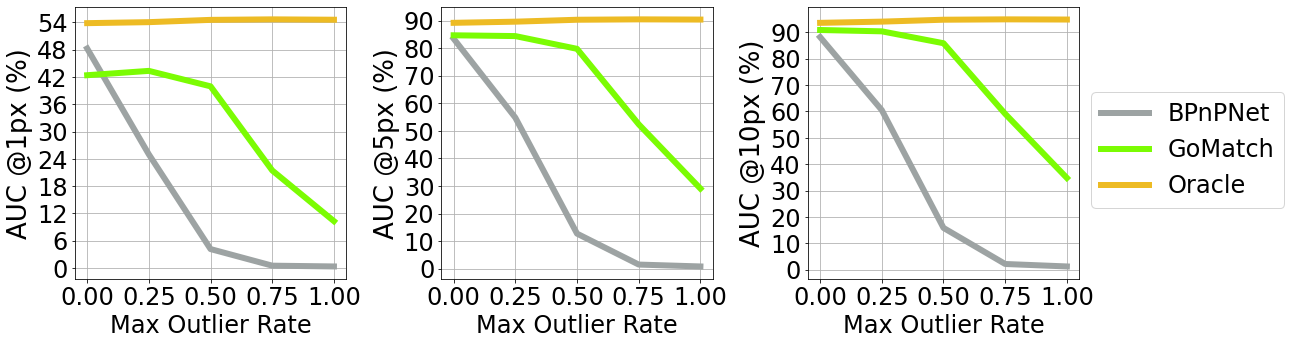

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from pathlib import Path
from gomatch_eval.plot_curves import *

cache_root = Path("../outputs/benchmark_cache_release/orate_ablation/covis1inls1")
model_caches = {
    'BPnPNet': 'BPnPNet.npy',
    'GoMatch' : 'GoMatchBVs_best.npy',  
    'Oracle' : 'OracleMatcher.npy',  
}

model_colors = {
    'BPnPNet': Color.GREY,
    'GoMatch' : Color.BRIGHTGREEN,
    'Oracle' : Color.YELLOW,
}

auc_thresholds = [1, 5, 10]
model_results = {}
for model_name, cache_name in model_caches.items():    
    max_orates, aucs = load_ablation_cache(
        cache_root / cache_name, auc_thresholds, key_name='Max orate'
    )
    model_results[model_name] = aucs
    print(f"{model_name} max orates={max_orates} AUC@{auc_thresholds}px\n{aucs}")


# Plotting
plot_orate_ablation_curves(model_results, model_colors, max_orates, auc_thresholds)


In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch

from gomatch_eval.benchmark import  run_benchmark

# Define models
gomatchbvs = '../outputs/shared_outputs/release_models/exported_models/GoMatchBVs_best.ckpt'
gomatchcoords = '../outputs/shared_outputs/release_models/exported_models/GoMatchCoords_best.ckpt'
bpnpnet = '../outputs/shared_outputs/release_models/exported_models/BPnPNet.ckpt'

# Run
splits = ('kings', 'old', 'shop', 'stmarys')

for split in splits:
    run_benchmark(
        root_dir='..', 
        dataset_name='cambridge_sift',
        p2d_type='sift',
        split=split,
        ckpt=gomatchbvs,
        vismatch=True,
        merge_before_match=False,
        overwrite=False,
        debug=False, 
        oracle=False,
        odir='outputs/benchmark_cache_release',
        covis_k_nums=[10],
    )
    


[2022-07-10 17:52:03|data_loader|INFO]: Init data loader: split=kings training=False batch=16...
[2022-07-10 17:52:03|data_process|INFO]: Loading data file from ../data/cambridge/data_processed/query-netvlad10-sift/cambridge_2d3d.npy
[2022-07-10 17:52:04|data_process|INFO]: Loading scene 3D points from ../data/cambridge/data_processed/query-netvlad10-sift/scene_points3d/all.npy ...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
../data/cambridge/data_processed/query-netvlad10-sift/scene_points3d/all.npy


[2022-07-10 17:52:05|data_process|INFO]: Done with 3D data loading.
[2022-07-10 17:52:05|data_process|INFO]: Fetching scene data for: 1 scenes
Feature dir:../data/cambridge/data_processed/query-netvlad10-sift/desc_cache/SIFT1024
[2022-07-10 17:52:12|data_process|INFO]: Finished loading scenes: 5, queries: 343 im.pts3d:258 #ims(pts3d <20)=0
[2022-07-10 17:52:12|data_loader|INFO]: 
Dataset:cambridge_sift split=kings scenes:1 queries: 343
Data processed dir: ../data/cambridge/data_processed/query-netvlad10-sift
Settings=(
  topk=1, random_topk=False, orate=[0, 1], npt=[10, 1024],
  p2d_type=sift, p3d_type=visdesc load_desc=True, merge_p3dm=False
  inls_thres=1 normalized_thres=False quant_desc=None
)

[2022-07-10 17:52:12|gomatch_eval|INFO]: 


>>>>>Visual Desc Matching
[2022-07-10 17:52:12|gomatch_eval|INFO]: Load cache: ../outputs/benchmark_cache_release/cambridge_sift/kings/sift_inls1.merge_after_match/VisMatcher.npy
[2022-07-10 17:52:13|gomatch_eval|INFO]: >>>>> covis_k=10 
[2022-07-1

../data/cambridge/data_processed/query-netvlad10-sift/scene_points3d/all.npy


[2022-07-10 17:52:16|data_process|INFO]: Loading scene 3D points from ../data/cambridge/data_processed/query-netvlad10-sift/scene_points3d/all.npy ...
[2022-07-10 17:52:17|data_process|INFO]: Done with 3D data loading.
[2022-07-10 17:52:17|data_process|INFO]: Fetching scene data for: 1 scenes
Feature dir:../data/cambridge/data_processed/query-netvlad10-sift/desc_cache/SIFT1024
[2022-07-10 17:52:20|data_process|INFO]: Finished loading scenes: 5, queries: 182 im.pts3d:177 #ims(pts3d <20)=6
[2022-07-10 17:52:20|data_loader|INFO]: 
Dataset:cambridge_sift split=old scenes:1 queries: 182
Data processed dir: ../data/cambridge/data_processed/query-netvlad10-sift
Settings=(
  topk=1, random_topk=False, orate=[0, 1], npt=[10, 1024],
  p2d_type=sift, p3d_type=visdesc load_desc=True, merge_p3dm=False
  inls_thres=1 normalized_thres=False quant_desc=None
)

[2022-07-10 17:52:20|gomatch_eval|INFO]: 


>>>>>Visual Desc Matching
[2022-07-10 17:52:20|gomatch_eval|INFO]: Load cache: ../outputs/benchmark

../data/cambridge/data_processed/query-netvlad10-sift/scene_points3d/all.npy


[2022-07-10 17:52:21|data_process|INFO]: Done with 3D data loading.
[2022-07-10 17:52:21|data_process|INFO]: Fetching scene data for: 1 scenes
Feature dir:../data/cambridge/data_processed/query-netvlad10-sift/desc_cache/SIFT1024
[2022-07-10 17:52:23|data_process|INFO]: Finished loading scenes: 5, queries: 103 im.pts3d:209 #ims(pts3d <20)=0
[2022-07-10 17:52:23|data_loader|INFO]: 
Dataset:cambridge_sift split=shop scenes:1 queries: 103
Data processed dir: ../data/cambridge/data_processed/query-netvlad10-sift
Settings=(
  topk=1, random_topk=False, orate=[0, 1], npt=[10, 1024],
  p2d_type=sift, p3d_type=visdesc load_desc=True, merge_p3dm=False
  inls_thres=1 normalized_thres=False quant_desc=None
)

[2022-07-10 17:52:23|gomatch_eval|INFO]: 


>>>>>Visual Desc Matching
[2022-07-10 17:52:23|gomatch_eval|INFO]: Load cache: ../outputs/benchmark_cache_release/cambridge_sift/shop/sift_inls1.merge_after_match/VisMatcher.npy
[2022-07-10 17:52:23|gomatch_eval|INFO]: >>>>> covis_k=10 
[2022-07-10 

../data/cambridge/data_processed/query-netvlad10-sift/scene_points3d/all.npy


[2022-07-10 17:52:24|data_process|INFO]: Done with 3D data loading.
[2022-07-10 17:52:24|data_process|INFO]: Fetching scene data for: 1 scenes
Feature dir:../data/cambridge/data_processed/query-netvlad10-sift/desc_cache/SIFT1024
[2022-07-10 17:52:36|data_process|INFO]: Finished loading scenes: 5, queries: 530 im.pts3d:281 #ims(pts3d <20)=5
[2022-07-10 17:52:36|data_loader|INFO]: 
Dataset:cambridge_sift split=stmarys scenes:1 queries: 530
Data processed dir: ../data/cambridge/data_processed/query-netvlad10-sift
Settings=(
  topk=1, random_topk=False, orate=[0, 1], npt=[10, 1024],
  p2d_type=sift, p3d_type=visdesc load_desc=True, merge_p3dm=False
  inls_thres=1 normalized_thres=False quant_desc=None
)

[2022-07-10 17:52:36|gomatch_eval|INFO]: 


>>>>>Visual Desc Matching
[2022-07-10 17:52:36|gomatch_eval|INFO]: Load cache: ../outputs/benchmark_cache_release/cambridge_sift/stmarys/sift_inls1.merge_after_match/VisMatcher.npy
[2022-07-10 17:52:36|gomatch_eval|INFO]: >>>>> covis_k=10 
[2022-

## Eval on 7Scenes

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch

from gomatch_eval.benchmark import  run_benchmark

# Define models
gomatchbvs = '../outputs/shared_outputs/release_models/exported_models/GoMatchBVs_best.ckpt'
gomatchcoords = '../outputs/shared_outputs/release_models/exported_models/GoMatchCoords_best.ckpt'
bpnpnet = '../outputs/shared_outputs/release_models/exported_models/BPnPNet.ckpt'

# Run
splits = ('chess', 'fire', 'heads', 'office', 'pumpkin', 'redkitchen', 'stairs')

for split in splits:
    run_benchmark(
        root_dir='..', 
        dataset_name='7scenes_sift_v2',
        p2d_type='sift',
        split=split,
        ckpt=gomatchbvs,
        vismatch=True,
        merge_before_match=False,
        overwrite=False,
        debug=False, 
        oracle=False,
        odir='../outputs/benchmark_cache_release',
        covis_k_nums=[10],
    )
    
